[**Demo %s**](#demo-gmres-restart)

The following experiments are based on a matrix resulting from discretization of a partial differential equation.

```{index} Julia; keyword function arguments
```

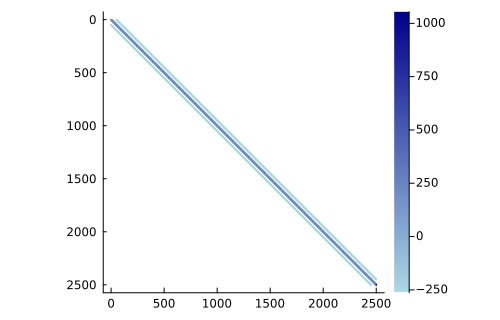

In [2]:
A = FNC.poisson(50)
n = size(A, 1)
b = ones(n);
spy(A, color=:blues)

```{index} ! Julia; gmres
```

We compare unrestarted GMRES with three different thresholds for restarting. Here we are using `gmres` from the `IterativeSolvers` package, since our simple implementation does not offer restarting.
```{tip}
:class: dropdown
The syntax `f(x;foo)` is shorthand for `f(x,foo=foo)`.
```

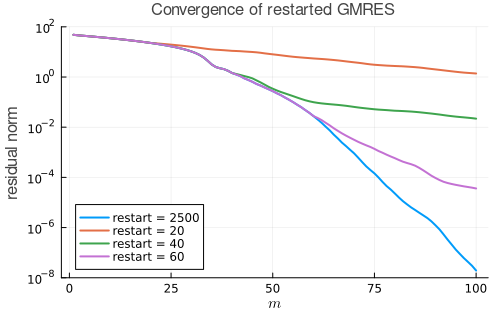

In [3]:
using IterativeSolvers
reltol = 1e-12;
plt = plot(title="Convergence of restarted GMRES", legend=:bottomleft,
    xaxis=(L"m"),  yaxis=(:log10, "residual norm", [1e-8, 100]))

for restart in [n, 20, 40, 60]
    x, hist = IterativeSolvers.gmres(A, b; restart, reltol,
        maxiter=100, log=true)
    plot!(hist[:resnorm], label="restart = $restart")
end

plt

The "pure" GMRES curve is the lowest one. All of the other curves agree with it until the first restart. Decreasing the restart value makes the convergence per iteration generally worse, but the time required per iteration smaller as well.